In [ ]:
pip install -U sentence-transformers

 # Zero-Shot Learning
 
* Zero-Shot Learning is a Machine Learning paradigm where a pre-trained model is used to evaluate test data of classes that have not been used during training.
*  That is, a model needs to extend to new categories without any prior semantic information.
*  Such learning frameworks alleviate the need for retraining models.

In [4]:
# dogcat dataset
# data:- https://github.com/laxmimerit/dog-cat-full-dataset.git

In [5]:
from sentence_transformers import SentenceTransformer,util
from PIL import Image
import matplotlib.pyplot as plt
import glob
import torch
import os

In [6]:
!git clone https://github.com/laxmimerit/dog-cat-full-dataset.git

Cloning into 'dog-cat-full-dataset'...
remote: Enumerating objects: 25027, done.
remote: Total 25027 (delta 0), reused 0 (delta 0), pack-reused 25027
Receiving objects: 100% (25027/25027), 541.62 MiB | 37.81 MiB/s, done.
Resolving deltas: 100% (5/5), done.
Updating files: 100% (25001/25001), done.


In [7]:
dog_names = list(glob.glob('/content/dog-cat-full-dataset/data/train/dogs/*jpg'))[:100]
cat_names = list(glob.glob('/content/dog-cat-full-dataset/data/train/cats/*jpg'))[:100]
img_names = dog_names + cat_names

In [8]:
from random import shuffle
shuffle(img_names)


In [ ]:
img_names

In [10]:
model = SentenceTransformer('clip-ViT-B-32') 

In [11]:
img_embed = model.encode([Image.open(img) for img in img_names], batch_size=32, convert_to_tensor=True,show_progress_bar=True)

Batches:   0%|          | 0/7 [00:00<?, ?it/s]

In [12]:
labels = ['dog', 'cat']

label_embed = model.encode(labels,convert_to_tensor=True)
cos_scores = util.cos_sim(img_embed, label_embed)

In [ ]:
cos_scores

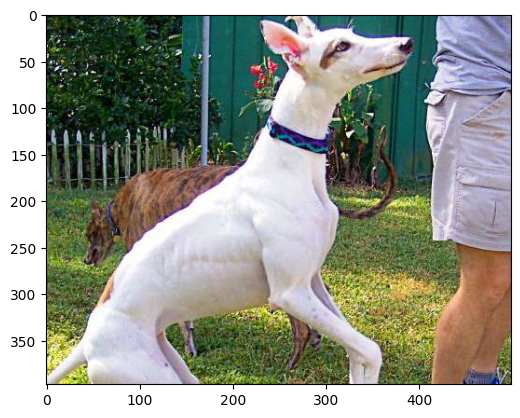

predicted Label: dog
------




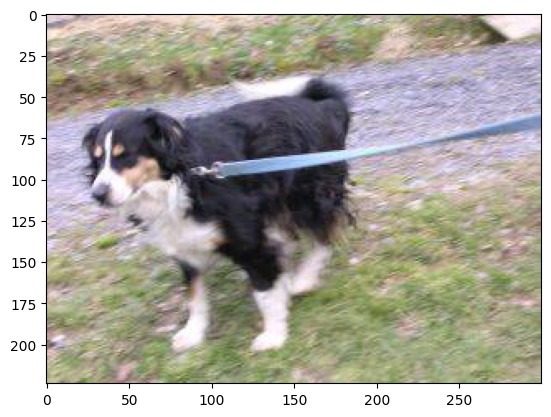

predicted Label: dog
------




In [14]:
pred_labels = torch.argmax(cos_scores, dim=1)

for img_name, pred_label in zip(img_names[:2], pred_labels[:2]):
  im = Image.open(img_name)
  plt.figure()
  plt.imshow(im)
  plt.show()
  print("predicted Label:", labels[pred_label])
  print("------\n\n")